In [0]:
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# loading the data from the pickle file
with open('/content/drive/My Drive/data.pkl','rb') as f:
    data = pickle.load(f)

In [0]:
x = data[:,:5] # input data with 5 dimension
y = data[:,-1] # output variable 

In [0]:
import numpy as np
import pandas as pd

In [0]:
w = np.random.normal(loc=0,scale=1,size=9) # generating 9 values of gaussion/normal random variable
# w = [0]*9

In [0]:
import math
# function returns the sigmoid(x)
def sigmoid(z):
    return 1/(1+math.exp(-z))

In [0]:
# function returns the loss generated by the computational graph
def forward_propagation(x,y,w,point):
    y_pred = w[8]*sigmoid(math.sin(w[2]*x[point][2])*(w[3]*x[point][3]+w[4]*x[point][4])+w[7])+math.tanh(math.exp(np.power((w[0]*x[point][0]+w[1]*x[point][1]),2)+w[5])+w[6])
    return y_pred,np.power(y[point]-y_pred,2)

In [0]:
# function returns the gradient of all the loss function with respect to the weights
def backward_propagation(x,y,w,point):
    y_pred,loss = forward_propagation(x,y,w,point)
    gw9 = -2*(y[point]-y_pred)*sigmoid(math.sin(w[2]*x[point][2])*(w[3]*x[point][3]+w[4]*x[point][4])+w[7])
    gw7 = -2*(y[point]-y_pred)*(1-np.power(math.tanh(math.exp(np.power((w[0]*x[point][0]+w[1]*x[point][1]),2)+w[5])+w[6]),2))
    gw8 = -2*(y[point]-y_pred)*w[8]*sigmoid(math.sin(w[2]*x[point][2])*(w[3]*x[point][3]+w[4]*x[point][4])+w[7])*(1-sigmoid(math.sin(w[2]*x[point][2])*(w[3]*x[point][3]+w[4]*x[point][4])+w[7]))
    gw6 = -2*(y[point]-y_pred)*(1-np.power(math.tanh(math.exp(np.power((w[0]*x[point][0]+w[1]*x[point][1]),2)+w[5])+w[6]),2))*(math.exp(np.power((w[0]*x[point][0]+w[1]*x[point][1]),2)+w[5]))
    gw5 = -2*(y[point]-y_pred)*w[8]*sigmoid(math.sin(w[2]*x[point][2])*(w[3]*x[point][3]+w[4]*x[point][4])+w[7])*(1-sigmoid(math.sin(w[2]*x[point][2])*(w[3]*x[point][3]+w[4]*x[point][4])+w[7]))*math.sin(w[2]*x[point][2])*x[point][4]
    gw4 = -2*(y[point]-y_pred)*w[8]*sigmoid(math.sin(w[2]*x[point][2])*(w[3]*x[point][3]+w[4]*x[point][4])+w[7])*(1-sigmoid(math.sin(w[2]*x[point][2])*(w[3]*x[point][3]+w[4]*x[point][4])+w[7]))*math.sin(w[2]*x[point][2])*x[point][3]
    gw3 = -2*(y[point]-y_pred)*w[8]*sigmoid(math.sin(w[2]*x[point][2])*(w[3]*x[point][3]+w[4]*x[point][4])+w[7])*(1-sigmoid(math.sin(w[2]*x[point][2])*(w[3]*x[point][3]+w[4]*x[point][4])+w[7]))*(w[3]*x[point][3]+w[4]*x[point][4])*math.cos(w[2]*x[point][2])*x[point][2]
    gw2 = -2*(y[point]-y_pred)*(1-np.power(math.tanh(math.exp(np.power((w[0]*x[point][0]+w[1]*x[point][1]),2)+w[5])+w[6]),2))*(math.exp(np.power((w[0]*x[point][0]+w[1]*x[point][1]),2)+w[5]))*2*x[point][1]*(w[0]*x[point][0]+w[1]*x[point][1])
    gw1 = -2*(y[point]-y_pred)*(1-np.power(math.tanh(math.exp(np.power((w[0]*x[point][0]+w[1]*x[point][1]),2)+w[5])+w[6]),2))*(math.exp(np.power((w[0]*x[point][0]+w[1]*x[point][1]),2)+w[5]))*2*x[point][0]*(w[0]*x[point][0]+w[1]*x[point][1])
    return [gw1,gw2,gw3,gw4,gw5,gw6,gw7,gw8,gw9],loss               

In [0]:
gradients,loss = backward_propagation(x,y,w,2)

In [11]:
gradients

[-0.2008382762719108,
 -0.08996778577844498,
 -0.07147587907621328,
 -0.02251947836632444,
 -0.01688425090873079,
 -0.41828958236217917,
 -0.6712311343572793,
 0.301032850364351,
 -1.4365513473835307]

In [12]:
loss

1.5590113582449987

In [0]:
# This function will check that the gradients are correctly implemented or not
def gradient_checking(x,y,w,point):
    aprox_gradients = []
    val = 1e-7
    for i in range(len(w)):
        plus = w[i]+val
        # print(plus)
        plus,w[i] = w[i],plus       
        _,plus_out = forward_propagation(x,y,w,point)
        w[i] = plus
        minus = w[i]-val
        minus,w[i] = w[i],minus
        _,minus_out = forward_propagation(x,y,w,point)
        w[i] = minus
        aprox_gradients.append((plus_out-minus_out)/(2*val))
    original_gradients,_ = backward_propagation(x,y,w,point)
    # print(original_gradients)
    # print(aprox_gradients)
    for j in range(len(original_gradients)):
        numerator = np.linalg.norm(original_gradients[j]-aprox_gradients[j])
        denominator = np.linalg.norm(original_gradients[j])+np.linalg.norm(aprox_gradients[j])
        difference = numerator/denominator
        # print(original_gradients[j])
        # print(aprox_gradients[j])
        # print(numerator,denominator,difference)
        if difference>=val:
            return 'gradients not implemented properly'
        print('gradient of w'+str(j)+' is implemented correctly')
    return

In [14]:
gradient_checking(x,y,w,2)

gradient of w0 is implemented correctly
gradient of w1 is implemented correctly
gradient of w2 is implemented correctly
gradient of w3 is implemented correctly
gradient of w4 is implemented correctly
gradient of w5 is implemented correctly
gradient of w6 is implemented correctly
gradient of w7 is implemented correctly
gradient of w8 is implemented correctly


## Task 2.1 Vanilla update of weights

## code inspired from
http://cs231n.github.io/neural-networks-3/#sgd

In [73]:
from tqdm import tqdm
# code implementing the vanilla update
w = np.random.normal(loc=0,scale=0.01,size=9)
# print(w)
learning_rate = 0.01
loss_list = []
for i in tqdm(range(100)):
    for j in range(len(x)):
        grad_weights,loss = backward_propagation(x,y,w,j)
        grad_weights_new = [z*learning_rate for z in grad_weights]
        w_new = w-grad_weights_new # here the weight update is using the simple SGD weight = weight-learning_rate*gradient
        w = w_new
    loss_list.append(loss)
# print(w)        

100%|██████████| 100/100 [00:04<00:00, 20.53it/s]


In [74]:
w

array([ 0.00877775, -0.0090359 , -0.97354992, -0.70162237, -0.76764513,
        0.41180653,  0.33968423,  0.71140262,  1.13269741])

In [0]:
import matplotlib.pyplot as plt

In [0]:
import seaborn as sb

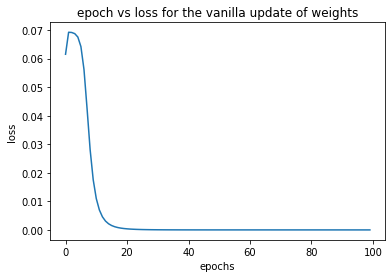

In [77]:
plt.plot(range(100),loss_list)
# plt.yscale('symlog')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('epoch vs loss for the vanilla update of weights')
plt.show()

from the above graph we can observe that the loss decreases as the number of epoches increases

## Task 2.2 Momentum update of weights

## code inspired from
http://cs231n.github.io/neural-networks-3/#sgd

In [78]:
# code implementation of SGD with moments
w = np.random.normal(loc=0,scale=0.01,size=9)
v = [0]*9
ga = 0.9
loss_list = []
for i in tqdm(range(100)):
    for j in range(len(x)):
        grad_weights,loss = backward_propagation(x,y,w,j)
        a = [ga*z for z in v]
        grad_weights_new = [z*learning_rate for z in grad_weights]
        b = grad_weights_new
        v = [a[z]-b[z] for z in range(len(v))] # here the weight is updated as follows v = etha*v-learning_rate*gradient
        w +=v                                  # weight = weight+v
    loss_list.append(loss)


100%|██████████| 100/100 [00:05<00:00, 19.32it/s]


In [79]:
w

array([ 0.01025642, -0.01389019,  1.00152963,  0.98988009,  0.98470208,
        0.72242644,  0.64592198,  1.00286392,  1.01053346])

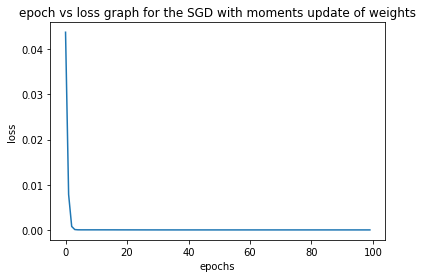

In [80]:
plt.plot(range(100),loss_list)
# plt.yscale('symlog')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('epoch vs loss graph for the SGD with moments update of weights')
plt.show()

as usual the loss decreases as the number of epoches increases and the loss reaches much more faster than the normal SGD becauses of the addition of moments which makes the weights to move faster towards the minima.

## Task 2.3 Adam Update of weights

## code inspired from
http://cs231n.github.io/neural-networks-3/#sgd

In [81]:
# code implementation of Adam update of moments
# weights in the Adam are implemented as following

# m = beta1*m + (1-beta1)*gradient
# mt = m / (1-beta1**t)
# v = beta2*v + (1-beta2)*(gradient**2)
# vt = v / (1-beta2**t)
# x += - learning_rate * mt / (np.sqrt(vt) + eps)

w = np.random.normal(loc=0,scale=0.01,size=9)
beta1 = 0.9
beta2 = 0.999
eps = 1e-8
m = [0]*9
v = [0]*9
loss_list = []
for i in tqdm(range(100)):
    for j in range(len(x)):
        grad_weights,loss = backward_propagation(x,y,w,j)
        a = [z*beta1 for z in m]
        b = [(1-beta1)*z for z in grad_weights]
        m = [a[z]+b[z] for z in range(len(a))]
        c = [z*beta2 for z in v]
        d = [(1-beta2)*z*z for z in grad_weights]
        v = [c[z]+d[z] for z in range(len(c))]
        m_new = [z/(1-beta1**(j+1)) for z in m]
        v_new = [z/(1-beta2**(j+1)) for z in v]
        w += [-learning_rate*z for z in m_new]/(np.sqrt(v_new)+eps)
    loss_list.append(loss)


100%|██████████| 100/100 [00:06<00:00, 15.86it/s]


In [82]:
w

array([-1.05504856, -1.27840681, -1.00651186, -0.97981082, -0.96910639,
        1.09180448,  0.79145853,  0.97782685,  1.00426477])

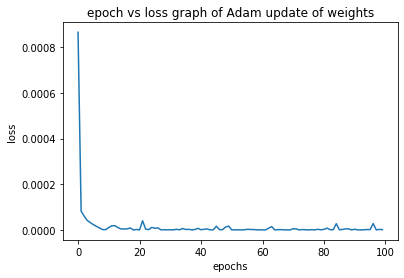

In [83]:
plt.plot(range(100),loss_list)
# plt.yscale('symlog')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('epoch vs loss graph of Adam update of weights')
plt.show()

as we can abserve that the loss decreases with the increase in the number of epoches also the spike in the graph is due to the abnormality in the data and also the equations taken (mt = m / (1-beta1**t)) and vt = v / (1-beta2**t)but it is faster than the SGD 

In [0]:
# from the three implementation of weight update we can observe that the 
# Adam converges faster when compares to the SGD with moments and 
# the SGD with moments converge faster when compared to the batch SGD